In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os 


df = pd.read_csv("../data/raw/mall_customers.csv")
print(f'loaded dataset : {df.shape[0]} rows, {df.shape[1]} columns')
df

loaded dataset : 200 rows, 5 columns


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
import pandas as pd

df = pd.read_csv("../data/raw/mall_customers.csv")
df = df.rename(columns={
    "Annual Income (k$)" : "annual_income",
    "Spending Score (1-100)" : "spending_score"
})
df

,CustomerID,Genre,Age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [8]:
features = df[['annual_income', 'spending_score']]
features.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

# Elbow Method

In [10]:
from sklearn.cluster import KMeans

inertia = []

K = range(1,11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

c:\Users\Acer\AppData\Local\Programs\Python\Python314\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Acer\AppData\Local\Programs\Python\Python314\Lib\site-packages\joblib\externals\loky\backend\context.py", line 255, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


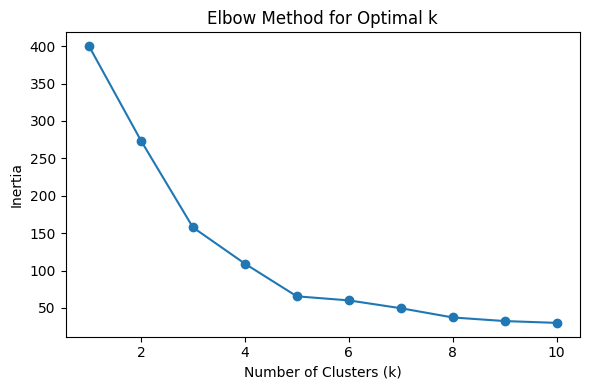

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.savefig("../outputs/plots/elbow_method_k-means",dpi=300,bbox_inches='tight')
plt.tight_layout()
plt.show()

# FIT K MINS & VISUALIZATION CLUSTER

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['cluster'] = clusters
df

,CustomerID,Genre,Age,annual_income,spending_score,clusters,cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,2
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,2
4,5,Female,31,17,40,4,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,1
196,197,Female,45,126,28,3,3
197,198,Male,32,126,74,1,1
198,199,Male,32,137,18,3,3


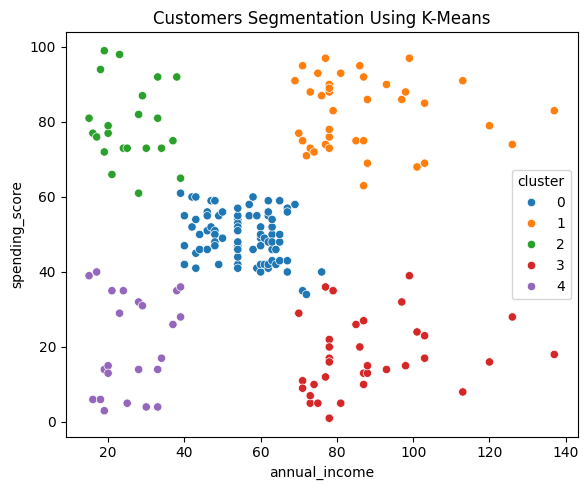

In [22]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    data = df,
    x = 'annual_income',
    y = 'spending_score',
    hue ='cluster',
    palette='tab10'
)
plt.title("Customers Segmentation Using K-Means")
plt.savefig("../outputs/plots/customers_segmentation_using_k-means", dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [17]:
cluster_profil = (
    df
    .groupby('cluster')[['annual_income', 'spending_score']]
    .mean()
    .round(1)
)

cluster_profil

,annual_income,spending_score
cluster,,
0,55.3,49.5
1,86.5,82.1
2,25.7,79.4
3,88.2,17.1
4,26.3,20.9


In [19]:
df.groupby('cluster').agg(
    count=('CustomerID', 'count'),
    avg_income=('annual_income','mean'),
    avg_spending=('spending_score','mean'),
    avg_age=('Age','mean')
).round(1)

,count,avg_income,avg_spending,avg_age
cluster,,,,
0,81,55.3,49.5,42.7
1,39,86.5,82.1,32.7
2,22,25.7,79.4,25.3
3,35,88.2,17.1,41.1
4,23,26.3,20.9,45.2
